# DS-GA 1001 Project
## Preliminary Exploration

This script serves as an early stage exploration of data set
***

## 1. Raw Data Set
### 1.1 Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Data = pd.read_csv("mortgage.csv")

In [4]:
Data.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [5]:
Data.shape

(622489, 23)

### 1.2 Detect Duplicate Records

In [6]:
Data['duplicate'] = Data.duplicated(subset=None, keep='first')

In [7]:
Data[Data['duplicate']==True].shape

(305, 24)

In [8]:
Data[Data['duplicate']==True].describe()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,305.000000,305.0,305.000000,305.000000,305.000000,3.050000e+02,305.000000,305.000000,3.050000e+02,3.050000e+02,...,305.000000,305.000000,3.050000e+02,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000
mean,37348.098361,51.0,16.524590,19.068852,120.029508,1.158219e+05,64.190282,6.116164,1.586000e+02,1.269044e+00,...,0.616393,0.652459,1.491317e+05,713.488525,75.195410,6.103459,174.700689,0.009836,0.0,0.009836
std,331.477638,0.0,3.425939,3.442934,28.442736,1.176609e+05,24.984485,0.751352,8.540525e-13,4.670600e-15,...,0.487063,0.476972,1.355691e+05,47.001267,11.511278,0.847214,22.765608,0.098850,0.0,0.098850
min,36709.000000,51.0,7.000000,12.000000,56.000000,5.300060e+03,5.297221,2.000000,1.586000e+02,1.269044e+00,...,0.000000,0.000000,2.250000e+04,576.000000,50.700000,0.000000,123.640000,0.000000,0.0,0.000000
25%,37054.000000,51.0,14.000000,17.000000,78.000000,4.816255e+04,43.559377,5.750000,1.586000e+02,1.269044e+00,...,0.000000,0.000000,7.040000e+04,678.000000,67.200000,5.750000,155.770000,0.000000,0.0,0.000000
50%,37400.000000,51.0,17.000000,19.000000,136.000000,8.631453e+04,64.970620,6.125000,1.586000e+02,1.269044e+00,...,1.000000,1.000000,1.125000e+05,712.000000,77.000000,6.125000,179.450000,0.000000,0.0,0.000000
75%,37630.000000,51.0,18.000000,21.000000,138.000000,1.379155e+05,83.932371,6.500000,1.586000e+02,1.269044e+00,...,1.000000,1.000000,1.750000e+05,752.000000,80.000000,6.500000,186.910000,0.000000,0.0,0.000000
max,37853.000000,51.0,29.000000,32.000000,186.000000,1.064448e+06,121.733525,8.375000,1.586000e+02,1.269044e+00,...,1.000000,1.000000,1.275000e+06,809.000000,100.000000,8.375000,226.290000,1.000000,0.0,1.000000


**All duplicate records are on period 51 (time = 51.0) <br>
Theoretically, the duplicate records shouldn't impact our sampling as long as we don't use 51.0 as a sampling time.**

## 2. Aggregation

### 2.1 Aggregate by borrower's ID

In [9]:
Data.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,duplicate
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,0,45000.0,715,69.4,9.2,87.03,0,0,0,False
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,0,45000.0,715,69.4,9.2,87.03,0,0,0,False
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,0,45000.0,715,69.4,9.2,87.03,0,0,0,False
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,0,45000.0,715,69.4,9.2,87.03,0,0,0,False
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,0,45000.0,715,69.4,9.2,87.03,0,0,0,False


In [10]:
# Print all columns in raw data set
Data.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'duplicate'],
      dtype='object')

List of variables and method of transformation:
- time: count (number of obsevation period existed in record)
- orig_time, first_time, mat_time : fixed for each borrower, so keep
- balance_time, LTV_time, interest_rate_time, hpi_time, gdp_time, uer_time: average, for now
- REtype_CO, REtype_PU, REtypeSF: real estate type, fixed, keep first
- investor_orig_time, ..., hpi_orig_time: fixed, keep
- default_time, pay_off_time: keep max (1 or 0)
- status_time: keep max (0, 1, 2)

In [11]:
Agg1 = Data.groupby(['id'])['time'].count()
Agg2 = Data.groupby(['id'])['orig_time','first_time', 'mat_time'].first()
Agg3 = Data.groupby(['id'])['balance_time','LTV_time', 'interest_rate_time','hpi_time', 
                            'gdp_time','uer_time'].mean()
Agg4 = Data.groupby(['id'])['REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time'].first()
Agg5 = Data.groupby(['id'])['investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',].first()
Agg6 = Data.groupby(['id'])['default_time', 'payoff_time','status_time'].max()

In [12]:
Data_AggID = pd.DataFrame(Agg1)
Data_AggID = Data_AggID.join(Agg2).join(Agg3).join(Agg4).join(Agg5).join(Agg6)
Data_AggID.head()

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
id,,,,,,,,,,,,,,,,,,,,,
1,24,-7,25,113,34440.338333,26.319186,9.200000,176.657917,0.879284,7.241667,...,1,0,45000.0,715,69.4,9.200,87.03,1,0,1
2,2,18,25,138,105740.575000,65.350597,7.680000,225.695000,2.525251,4.700000,...,1,0,107200.0,558,80.0,7.680,186.91,0,1,2
3,5,-6,25,114,44619.892000,30.953371,11.025000,222.164000,2.066873,4.580000,...,1,0,48600.0,680,83.6,8.750,89.58,0,1,2
4,35,-2,25,119,57546.403143,41.626867,10.107143,176.642286,1.264322,7.162857,...,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
5,3,18,25,138,52198.260000,65.821242,9.155000,224.593333,2.470741,4.600000,...,1,0,52800.0,527,80.0,9.155,186.91,0,1,2


In [13]:
Data_AggID.describe()

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,49982.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,12.449780,20.392100,24.696100,137.642060,2.458105e+05,79.556322,7.14994,194.587889,1.820886,5.737386,...,0.62284,0.118200,2.519776e+05,661.397400,79.703120,5.418841,196.376753,0.303080,0.531780,1.366640
std,11.645955,7.877401,7.898468,17.538606,2.048184e+05,20.244734,1.80392,22.582903,1.133851,1.123230,...,0.48468,0.322848,2.088571e+05,72.675182,9.914705,3.366501,34.333983,0.459594,0.498994,0.750004
min,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,0.000000,0.00000,107.830000,-3.831639,3.800000,...,0.00000,0.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,4.000000,17.000000,20.000000,136.000000,1.103528e+05,67.141609,6.00000,177.691818,1.135030,4.750000,...,0.00000,0.000000,1.140000e+05,612.000000,75.000000,2.001000,179.450000,0.000000,0.000000,1.000000
50%,8.000000,22.000000,25.000000,141.000000,1.883771e+05,79.504894,7.00000,195.010000,1.795447,5.277778,...,1.00000,0.000000,1.920000e+05,663.000000,80.000000,6.400000,212.730000,0.000000,1.000000,2.000000
75%,18.000000,25.000000,28.000000,145.000000,3.278926e+05,93.331163,8.17500,215.846667,2.789702,6.867763,...,1.00000,0.000000,3.350000e+05,715.000000,85.000000,7.700000,222.390000,1.000000,1.000000,2.000000
max,60.000000,60.000000,60.000000,229.000000,7.943923e+06,687.999659,37.50000,226.290000,5.132464,9.571429,...,1.00000,1.000000,8.000000e+06,834.000000,218.500000,19.750000,226.290000,1.000000,1.000000,2.000000


### 2.2 Base Rate of Default Class

**There're 3 outcomes regarding default.** 
- "Default_time" = 1 indicates default
- "Payoff_time" = 1 indicates pay off
- All others indicate neither default nor pay off

The 3 outcomes can also be directly observed from "status_time": 1 - default, 2 - payoff, 0 - neither

In [14]:
Data_AggID.describe()[['default_time', 'payoff_time','status_time']].loc['mean']

default_time    0.30308
payoff_time     0.53178
status_time     1.36664
Name: mean, dtype: float64

In [15]:
1 - 0.30308 - 0.53178

0.16513999999999995

**Percentage of default: 30.3%** <br>
**Percentage of pay-off: 53.2% (surprise!)** <br>
**Percentage of neither above: 1 - 0.30308 - 0.53178 = 16.5%** <br>

Payoff proportion is higher than we expected

### 2.3 Observation on Pay-Off

In [16]:
PayOff = Data_AggID[Data_AggID['status_time']==2]
PayOff.describe()

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,26589.000000,26589.000000,26589.000000,26589.000000,2.658900e+04,26582.000000,26589.000000,26589.000000,26589.000000,26589.000000,...,26589.000000,26589.000000,2.658900e+04,26589.000000,26589.000000,26589.00000,26589.000000,26589.0,26589.0,26589.0
mean,8.253037,18.375757,22.069690,134.717402,2.473643e+05,72.624864,7.163298,200.946499,2.305405,5.330863,...,0.626161,0.106585,2.539986e+05,665.677950,79.210583,5.06313,187.423205,0.0,1.0,2.0
std,8.306143,7.415617,6.498579,17.536854,2.098057e+05,17.594012,1.744042,23.639105,1.067109,0.904644,...,0.483831,0.308591,2.166691e+05,74.470421,10.422163,3.43042,35.275696,0.0,0.0,0.0
min,1.000000,-40.000000,1.000000,23.000000,0.000000e+00,0.000000,1.125000,107.830000,-3.831639,3.800000,...,0.000000,0.000000,0.000000e+00,400.000000,50.100000,0.00000,75.710000,0.0,1.0,2.0
25%,3.000000,15.000000,19.000000,134.000000,1.121000e+05,62.632442,6.000000,186.120000,1.630242,4.700000,...,0.000000,0.000000,1.151200e+05,614.000000,75.000000,0.00000,161.270000,0.0,1.0,2.0
50%,5.000000,19.000000,22.000000,139.000000,1.880508e+05,72.189246,6.887500,208.860000,2.472118,5.000000,...,1.000000,0.000000,1.912500e+05,668.000000,80.000000,6.10000,191.420000,0.0,1.0,2.0
75%,10.000000,23.000000,25.000000,143.000000,3.279668e+05,81.875543,8.125000,220.234444,3.183507,5.500000,...,1.000000,0.000000,3.360000e+05,724.000000,85.000000,7.40000,221.910000,0.0,1.0,2.0
max,51.000000,60.000000,60.000000,228.000000,7.943923e+06,546.197274,37.500000,226.290000,5.132464,9.571429,...,1.000000,1.000000,8.000000e+06,834.000000,218.500000,18.00000,226.290000,0.0,1.0,2.0


**Check the last balance before they pay-off**

In [17]:
LastBalance = Data.groupby(['id'])['balance_time','status_time'].last()
LastBalance_PayOff = LastBalance[LastBalance['status_time'] == 2]
LastBalance_PayOff.describe()

,balance_time,status_time
count,2.658900e+04,26589.0
mean,2.406339e+05,2.0
std,2.081895e+05,0.0
min,0.000000e+00,2.0
25%,1.087624e+05,2.0
50%,1.841107e+05,2.0
75%,3.201078e+05,2.0
max,8.688101e+06,2.0


In [18]:
def CheckPayOffBalance(amount):
    data = LastBalance_PayOff[LastBalance_PayOff['balance_time'] < amount]
    return data.shape[0]

In [19]:
CheckList = [0, 100, 500, 1000, 2000, 5000, 8000, 10000, 20000, 30000, 40000, 60000, 80000, 120000, 
             150000, 300000, 500000, 750000, 1000000]
PayOffBalance = []
for i in CheckList:
    PayOffBalance.append(CheckPayOffBalance(i))

**A cumulative plot for pay-off balance**

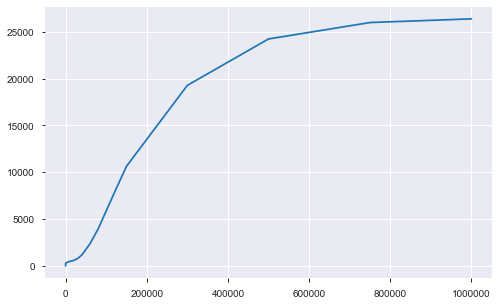

In [20]:
plt.figure(figsize=(8,5))
plt.plot(CheckList, PayOffBalance)

**Histrogram for pay_off balance**

(array([ 474.,  119.,  214.,  362.,  496.,  695.,  725.,  852.,  903.,
         980.,  963., 1021.,  994.,  971.,  866.,  858.,  754.,  750.,
         719.,  657.,  695.,  574.,  573.,  563.,  494.,  458.,  400.,
         403.,  352.,  389.,  299.,  347.,  358.,  318.,  304.,  348.,
         239.,  309.,  256.,  285.,  232.,  216.,  196.,  196.,  202.,
         161.,  170.,  174.,  160.,  181.,  122.,  143.,  139.,  111.,
         107.,  123.,  101.,   78.,   91.,   77.,   81.,   56.,   65.,
          61.,   95.,   57.,   26.,   26.,   36.,   23.,   30.,   23.,
          31.,   20.,   30.,   31.,   19.,   15.,   18.,   11.,   21.,
          15.,   19.,    9.,   10.,   13.,   10.,    8.,   18.,   25.,
          10.,   13.,   20.,   10.,   11.,   17.,    9.,   19.,   10.,
          54.]),
 array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
          60000.,   70000.,   80000.,   90000.,  100000.,  110000.,
         120000.,  130000.,  140000.,  150000.,  160000.,  170000.

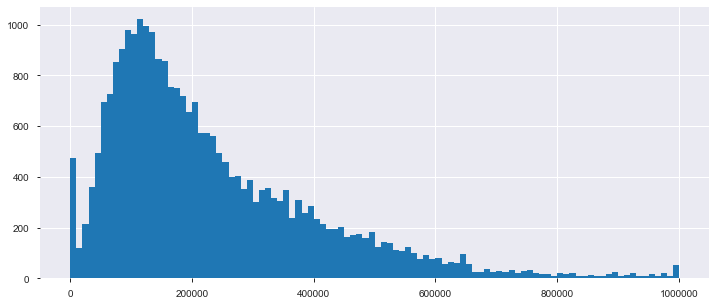

In [21]:
plt.figure(figsize=(12,5))
plt.hist(LastBalance_PayOff['balance_time'], bins = 100, range=(0, 1000000))

### 2.5 Borrowers existing at each observation time

**How many borrowers are recorded for each observation time period?**

In [23]:
AggTime = Data.groupby(['time'])['id'].count()
AggTime = AggTime.to_frame()

Text(0.5, 1.0, 'Distribution of records across observation periods')

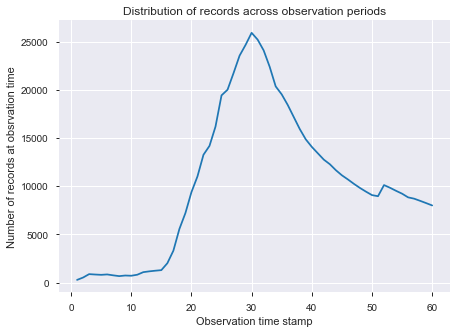

In [24]:
plt.figure(figsize=(7,5))
plt.plot(AggTime.index, AggTime['id'])
plt.xlabel('Observation time stamp')
plt.ylabel('Number of records at obsrvation time')
plt.title('Distribution of records across observation periods')